# Phase 3: SQL Operations

In [1]:
import sqlite3
import csv

## 3.1 
Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [2]:
db = sqlite3.connect('crime_against_women.db')
cursor=db.cursor()
# cursor.execute("DROP TABLE IF EXISTS CRIME")
cursor.execute('''CREATE TABLE IF NOT EXISTS CRIME
             (STATE TEXT, 
             DISTRICT TEXT, 
             Year INTEGER,
             Rape INTEGER,
             Kidnapping INTEGER,
             Dowry INTEGER,
             Assault  INTEGER,
             Insult  INTEGER,
             Cruelty INTEGER, 
             Importation INTEGER)''')

In [3]:
with open(r"india_crimes/42_District_wise_crimes_committed_against_women_2001_2012.csv",'r') as csvfile:
    reader = csv.DictReader(csvfile)
    no_records=0
    for row in reader:
        cursor.execute("INSERT INTO CRIME (STATE, DISTRICT,Year,Rape,Kidnapping,Dowry,Assault,Insult,Cruelty,Importation) VALUES (?, ?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Rape'],row['Kidnapping and Abduction'],row['Dowry Deaths'],row['Assault on women with intent to outrage her modesty'],row['Insult to modesty of Women'],row['Cruelty by Husband or his Relatives'],row['Importation of Girls']))

        no_records +=1

print(no_records,'Records inserted')



9017 Records inserted


In [4]:
db.commit

<function Connection.commit()>

In [5]:
table=cursor.execute("SELECT * FROM CRIME")
for row in table:
    print (row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', 2001, 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', 2001, 29, 47, 13, 141, 107, 92, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 59, 27, 14, 176, 41, 69, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 35, 20, 26, 100, 25, 192, 0)
('ANDHRA PRADESH', 'NALGONDA', 2001, 35, 19, 31, 188, 59, 214, 0)
('AN

## 3.2 
Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

Maximum Rapes:

In [6]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Rape, Kidnapping FROM CRIME WHERE (Rape) = (SELECT MAX(Rape) FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL'))")
for row in cursor:
    print(row)

('KERALA', 'TOTAL', 2008, 568, 166)
('KERALA', 'TOTAL', 2009, 568, 173)
('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)


Maximum Kidnappings:

In [7]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Rape, Kidnapping FROM CRIME WHERE (Kidnapping) = (SELECT MAX(Kidnapping) FROM CRIME WHERE DISTRICT NOT IN ('TOTAL','DELHI UT TOTAL'))")
for row in cursor:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)


Maximum Rapes and Kidnapping: 

In [8]:
cursor = db.execute("SELECT STATE, DISTRICT, Year, Rape, Kidnapping FROM CRIME WHERE (Rape, Kidnapping) IN ((SELECT MAX(Rape), MAX(Kidnapping) FROM CRIME))")
for row in cursor:
    print(row)


There is no output for Maximum rapes and kidnapping

## 3.3 
Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

Minimum Rapes:

In [9]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Rape, Kidnapping FROM CRIME WHERE (Rape) = (SELECT MIN(Rape) FROM CRIME)")
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0, 0)
('ARUNACHAL PRADESH', 'KAMENG WEST', 2001, 0, 2)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('BIHAR', 'KATIHAR RLY.', 2001, 0, 1)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0, 0)
('HARYANA', 'GRP', 2001, 0, 2)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0, 0)
('JAMMU & KASHMIR', 'KARGIL', 2001, 0, 1)
('JAMMU & KASHMIR', 'LEH', 2001, 0, 1)
('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0, 0)
('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0, 0)
('MAHARASHTRA', 'PUNE RLY.', 2001, 0, 0)
('MANIPUR', 'CHANDEL', 2001, 0, 1)
('MANIPUR', 'SENAPATI', 2001, 0, 0)
('MANIPUR', 'TAMENGLONG', 2001, 0, 0)
('MANIPUR', 'UKHRUL', 2001, 0, 1)
('MIZORAM', 'MAMIT', 2001, 0, 0)
('NAGALAND', 'KIPHIRE', 2001, 0, 0)
('NAGALAND', 'PEREN', 2001, 0, 0)
('NAGALAND', 'TUENSANG', 2001, 0, 0)
('PUNJAB', 'G.R.P', 2001, 0, 0)
('SIKKI

Minimum Kidnappings:

In [10]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Rape, Kidnapping FROM CRIME WHERE (Kidnapping) = (SELECT MIN(Kidnapping) FROM CRIME)")
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0, 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2001, 1, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 1, 0)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('ASSAM', 'G.R.P.', 2001, 1, 0)
('ASSAM', 'R.P.O.', 2001, 3, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('BIHAR', 'JAMALPUR RLY.', 2001, 1, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 4, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0, 0)
('CHHATTISGARH', 'KAWARDHA', 2001, 35, 0)
('GUJARAT', 'W.RLY', 2001, 1, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0, 0)
('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0, 0)
('JHARKHAND', 'DEOGHAR', 2001, 22, 0)
('JHARKHAND', 'DHANBAD RLY.', 2001, 2, 0)
('JHARKHAND', 'DUMKA', 2001, 27, 0)
('JHARKHAND', 'JAMSHEDPUR RLY.', 2001, 1, 0)
('JHARKHAND', 'PAKUR', 2001, 23, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 18, 0)
('KARNATAKA', 'HASSAN', 2001, 20, 0)
('KARNATAKA', 'RAILWAY

Minimum Rapes and Kidnapping:

In [11]:
cursor = db.execute("SELECT STATE, DISTRICT,Year,Rape, Kidnapping FROM CRIME WHERE (Rape, Kidnapping) = (SELECT MIN(Rape), MIN(Kidnapping) FROM CRIME)")
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2001, 0, 0)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0, 0)
('JAMMU & KASHMIR', 'RAILWAYS', 2001, 0, 0)
('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0, 0)
('MAHARASHTRA', 'PUNE RLY.', 2001, 0, 0)
('MANIPUR', 'SENAPATI', 2001, 0, 0)
('MANIPUR', 'TAMENGLONG', 2001, 0, 0)
('MIZORAM', 'MAMIT', 2001, 0, 0)
('NAGALAND', 'KIPHIRE', 2001, 0, 0)
('NAGALAND', 'PEREN', 2001, 0, 0)
('NAGALAND', 'TUENSANG', 2001, 0, 0)
('PUNJAB', 'G.R.P', 2001, 0, 0)
('SIKKIM', 'NORTH', 2001, 0, 0)
('TAMIL NADU', 'CHENNAI RLY.', 2001, 0, 0)
('TAMIL NADU', 'TRICHY RLY.', 2001, 0, 0)
('WEST BENGAL', 'ASANSOL', 2001, 0, 0)
('WEST BENGAL', 'SILIGURI G.R.P.', 2001, 0, 0)
('A & N ISLANDS', 'NICOBAR', 2001, 0, 0)
('DAMAN & DIU', 'DIU', 2001, 0,

## 3.4	
Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [12]:
db1 = sqlite3.connect('crime_against_st.db')
db1.execute("DROP TABLE IF EXISTS CRIME1")
db1.execute('''CREATE TABLE CRIME1
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,Murder INTEGER,Rape INTEGER,Kidnapping INTEGER,Dacoity INTEGER,Robbery  INTEGER,Arson  INTEGER,Hurt INTEGER, Protection  INTEGER,Prevention INTEGER,Other Crimes INTEGER)''')

In [13]:
with open(r"india_crimes/02_District_wise_crimes_committed_against_ST_2001_2012.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    no_records=0
    for row in reader:
        # Insert data into the table
        db1.execute("INSERT INTO CRIME1 (STATE, DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,Protection,Prevention,Other) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Murder'],row['Rape'],row['Kidnapping Abduction'],row['Dacoity'],row['Robbery'],row['Arson'],row['Hurt'],row['Protection of Civil Rights (PCR) Act'],row['Prevention of atrocities (POA) Act'],row['Other Crimes Against STs']))
        no_records +=1

print(no_records,'Records inserted')

9018 Records inserted


In [14]:
cursor=db1.execute("SELECT * FROM CRIME1")
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

## 3.5	
Write SQL query to find the highest number of dacoity/robbery in which district.

Highest number of Dacoity or Roberry:

In [15]:
cursor = db1.execute("SELECT DISTRICT, Dacoity, Robbery FROM CRIME1 WHERE Dacoity = (SELECT MAX(Dacoity) FROM CRIME1 WHERE DISTRICT NOT IN ('TOTAL', 'DELHI UT TOTAL')) UNION SELECT DISTRICT, Dacoity, Robbery FROM CRIME1 WHERE Robbery = (SELECT MAX(Robbery) FROM CRIME1 WHERE DISTRICT NOT IN ('TOTAL', 'DELHI UT TOTAL'))")
for row in cursor:
    print(row)



('DAHOD', 12, 32)
('DAHOD', 29, 31)
('TOTAL', 29, 34)


## 3.6	
Write SQL query to find in which districts(All) the lowest number of murders happened

In [16]:
cursor = db1.execute("SELECT STATE, DISTRICT,Murder FROM CRIME1 WHERE (Murder) = (SELECT MIN(Murder) FROM CRIME1)")
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 0)
('ANDHRA PRADESH', 'ANANTAPUR', 0)
('ANDHRA PRADESH', 'CHITTOOR', 0)
('ANDHRA PRADESH', 'CUDDAPAH', 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 0)
('ANDHRA PRADESH', 'GUNTUR', 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', 0)
('ANDHRA PRADESH', 'KARIMNAGAR', 0)
('ANDHRA PRADESH', 'KRISHNA', 0)
('ANDHRA PRADESH', 'KURNOOL', 0)
('ANDHRA PRADESH', 'MEDAK', 0)
('ANDHRA PRADESH', 'NIZAMABAD', 0)
('ANDHRA PRADESH', 'PRAKASHAM', 0)
('ANDHRA PRADESH', 'RANGA REDDY', 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 0)
('ANDHRA PRADESH', 'SRIKAKULAM', 0)
('ANDHRA PRADESH', 'VIJAYAWADA', 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 0)
('ANDHRA PRADESH', 'VISAKHA RURAL', 0)
('ANDHRA PRADESH', 'VISAKHAPATNAM', 0)
('ANDHRA PRADESH', 'VIZIANAGARAM', 0)
('ANDHRA PRADESH', 'WARANGAL', 0)
('ANDHRA PRADESH', 'WEST GODAVARI', 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 0)
('ARUNACHAL PRADESH', 'DIBANG VALLEY', 0)
('ARUNACHAL PRADESH', 'KAMENG EAST', 0)
('ARUNAC

## 3.7	
Write SQL query to find the number of murders in ascending order in district and yearwise.

In [17]:
cursor=db1.execute("SELECT DISTRICT,Year,SUM(Murder) as TOTAL_MURDER from CRIME1 GROUP BY DISTRICT,Year")
for row in cursor:
    print(row)

('24 PARGANAS NORTH', 2001, 0)
('24 PARGANAS NORTH', 2002, 0)
('24 PARGANAS NORTH', 2003, 0)
('24 PARGANAS NORTH', 2004, 0)
('24 PARGANAS NORTH', 2005, 0)
('24 PARGANAS NORTH', 2006, 0)
('24 PARGANAS NORTH', 2007, 0)
('24 PARGANAS NORTH', 2008, 0)
('24 PARGANAS NORTH', 2009, 0)
('24 PARGANAS NORTH', 2010, 0)
('24 PARGANAS NORTH', 2011, 0)
('24 PARGANAS NORTH', 2012, 0)
('24 PARGANAS SOUTH', 2001, 0)
('24 PARGANAS SOUTH', 2002, 0)
('24 PARGANAS SOUTH', 2003, 0)
('24 PARGANAS SOUTH', 2004, 0)
('24 PARGANAS SOUTH', 2005, 0)
('24 PARGANAS SOUTH', 2006, 0)
('24 PARGANAS SOUTH', 2007, 0)
('24 PARGANAS SOUTH', 2008, 0)
('24 PARGANAS SOUTH', 2009, 0)
('24 PARGANAS SOUTH', 2010, 0)
('24 PARGANAS SOUTH', 2011, 0)
('24 PARGANAS SOUTH', 2012, 0)
('A and N ISLANDS', 2007, 0)
('ADILABAD', 2001, 0)
('ADILABAD', 2002, 0)
('ADILABAD', 2003, 0)
('ADILABAD', 2004, 0)
('ADILABAD', 2005, 0)
('ADILABAD', 2006, 0)
('ADILABAD', 2007, 1)
('ADILABAD', 2008, 0)
('ADILABAD', 2009, 0)
('ADILABAD', 2010, 0)
('ADILA

##  3.8.1	
Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [18]:
db2=sqlite3.connect('TOTAL CRIMES.db')

In [19]:
db2.execute("DROP TABLE IF EXISTS CRIME3")
db2.execute('''CREATE TABLE CRIME3
             (STATE TEXT , DISTRICT TEXT, Year INTEGER,MURDER INTEGER,ATTEMPT_MURDER INTEGER,CULPABLE_MURDER INTEGER,RAPE INTEGER,CUSTODIAL_RAPE INTEGER,OTHER_RAPE INTEGER,KIDNAPPING INTEGER,KIDNAPPING_GIRLS INTEGER,KIDNAPPING_OTHERS INTEGER,DACOITY INTEGER,PREPARATION_DACOITY INTEGER,ROBBERY INTEGER,BURGLARY INTEGER,THEFT INTEGER,AUTO_THEFT INTEGER,OTHER_THEFT INTEGER,RIOTS INTEGER,CRIMINAL_TRUST INTEGER,CHEATING INTEGER,COUNTERFIETING INTEGER,ARSON INTEGER,HURT INTEGER,DOWRY_DEATHS INTEGER,ASSAULT_WOMEN INTEGER,INSULT_WOMEN INTEGER,CRUELTY_HUSBAND INTEGER,IMPORTATION INTEGER,CAUSING_DEATH INTEGER,OTHER_IPC_CRIMES INTEGER,TOTAL_IPC_CRIMES INTEGER)''')


In [20]:
with open(r"india_crimes/01_District_wise_crimes_committed_IPC_2001_2012.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    no_record=0
    for row in reader:
        # Insert data into the table
        db2.execute("INSERT INTO CRIME3 (STATE, DISTRICT,Year,MURDER,ATTEMPT_MURDER,CULPABLE_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING,KIDNAPPING_GIRLS,KIDNAPPING_OTHERS,DACOITY,PREPARATION_DACOITY,ROBBERY,BURGLARY,THEFT,AUTO_THEFT,OTHER_THEFT,RIOTS,CRIMINAL_TRUST,CHEATING,COUNTERFIETING,ARSON,HURT,DOWRY_DEATHS,ASSAULT_WOMEN,INSULT_WOMEN,CRUELTY_HUSBAND,IMPORTATION,CAUSING_DEATH,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['YEAR'],row['MURDER'],row['ATTEMPT TO MURDER'],row['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'],row['RAPE'],row['CUSTODIAL RAPE'],row['OTHER RAPE'],row['KIDNAPPING & ABDUCTION'],row['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],row['KIDNAPPING AND ABDUCTION OF OTHERS'],row['DACOITY'],row['PREPARATION AND ASSEMBLY FOR DACOITY'],row['ROBBERY'],row['BURGLARY'],row['THEFT'],row['AUTO THEFT'],row['OTHER THEFT'],row['RIOTS'],row['CRIMINAL BREACH OF TRUST'],row['CHEATING'],row['COUNTERFIETING'],row['ARSON'],row['HURT/GREVIOUS HURT'],row['DOWRY DEATHS'],row['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],row['INSULT TO MODESTY OF WOMEN'],row['CRUELTY BY HUSBAND OR HIS RELATIVES'],row['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'],row['CAUSING DEATH BY NEGLIGENCE'],row['OTHER IPC CRIMES'],row['TOTAL IPC CRIMES']))
        no_records +=1

print(no_records,'Records inserted')
   

18035 Records inserted


In [21]:
cursor=db2.execute("SELECT * FROM CRIME3")
for row in cursor:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 17, 50, 0, 50, 46, 30, 16, 9, 0, 41, 198, 199, 22, 177, 78, 16, 104, 1, 30, 1131, 16, 149, 34, 175, 0, 181, 1518, 4154)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 1, 23, 0, 23, 53, 30, 23, 8, 0, 16, 191, 366, 57, 309, 168, 11, 65, 8, 69, 1543, 7, 118, 24, 154, 0, 270, 754, 4125)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 2, 27, 0, 27, 59, 34, 25, 4, 0, 14, 237, 723, 164, 559, 156, 33, 209, 9, 38, 2088, 14, 112, 83, 186, 0, 404, 1262, 5818)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 1, 20, 0, 20, 25, 20, 5, 1, 0, 4, 98, 173, 36, 137, 164, 12, 37, 2, 23, 795, 17, 126, 38, 57, 0, 233, 1181, 3140)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 1, 23, 0, 23, 49, 26, 23, 4, 0, 25, 437, 1021, 150, 871, 70, 50, 220, 3, 41, 1244, 12, 109, 58, 247, 0, 431, 2313, 6507)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 162, 0, 162, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 4, 104, 287)
('ANDHRA PRADESH', 'GUNTUR', 200

## 3.8.2	
Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [22]:
cursor=db2.execute("SELECT STATE, Year, DISTRICT, MAX(MURDER) AS Highest_Murders FROM CRIME3 WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') GROUP BY STATE, Year")
for row in cursor:
    print(row)


('A & N ISLANDS', 2001, 'ANDAMAN', 13)
('A & N ISLANDS', 2002, 'ANDAMAN', 14)
('A & N ISLANDS', 2003, 'ANDAMAN', 16)
('A & N ISLANDS', 2004, 'ANDAMAN', 13)
('A & N ISLANDS', 2005, 'ANDAMAN', 14)
('A & N ISLANDS', 2006, 'ANDAMAN', 3)
('A & N ISLANDS', 2007, 'A and N ISLANDS', 15)
('A & N ISLANDS', 2008, 'ANDAMAN', 8)
('A & N ISLANDS', 2009, 'ANDAMAN', 15)
('A & N ISLANDS', 2010, 'ANDAMAN', 8)
('A & N ISLANDS', 2011, 'ANDAMAN', 14)
('A & N ISLANDS', 2012, 'SOUTH', 8)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('ANDHRA PRADESH', 2002, 'RANGA REDDY', 214)
('ANDHRA PRADESH', 2003, 'GUNTUR', 210)
('ANDHRA PRADESH', 2004, 'MAHABOOBNAGAR', 183)
('ANDHRA PRADESH', 2005, 'MAHABOOBNAGAR', 212)
('ANDHRA PRADESH', 2006, 'CYBERABAD', 193)
('ANDHRA PRADESH', 2007, 'CYBERABAD', 186)
('ANDHRA PRADESH', 2008, 'CYBERABAD', 197)
('ANDHRA PRADESH', 2009, 'CYBERABAD', 186)
('ANDHRA PRADESH', 2010, 'CYBERABAD', 187)
('ANDHRA PRADESH', 2011, 'CYBERABAD', 213)
('ANDHRA PRADESH', 2012, 'CYBERABAD', 198)
('ARU

## 3.8.3	
Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order

In [23]:
import pandas as pd

In [24]:
df = pd.read_sql_query(("SELECT STATE, Year, DISTRICT, MAX(MURDER) AS Highest_Murders FROM CRIME3 WHERE DISTRICT NOT IN('TOTAL','DELHI UT TOTAL') GROUP BY STATE, Year"),db2)
df


,STATE,Year,DISTRICT,Highest_Murders
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,ANDAMAN,14
2,A & N ISLANDS,2003,ANDAMAN,16
3,A & N ISLANDS,2004,ANDAMAN,13
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
415,WEST BENGAL,2008,24 PARGANAS SOUTH,239
416,WEST BENGAL,2009,24 PARGANAS NORTH,229
417,WEST BENGAL,2010,PASCHIM MIDNAPUR,268
418,WEST BENGAL,2011,24 PARGANAS SOUTH,247


In [25]:
district_counts = df['DISTRICT'].value_counts()
filtered_districts = district_counts[district_counts >= 3]

In [26]:
filtered_df = df[df['DISTRICT'].isin(filtered_districts.index)]
sorted_df = filtered_df.sort_values(by=['Highest_Murders', 'Year'], ascending=[False, False])
print(sorted_df[['STATE', 'DISTRICT', 'Highest_Murders', 'Year']])

           STATE     DISTRICT  Highest_Murders  Year
51         BIHAR        PATNA              542  2004
50         BIHAR        PATNA              484  2003
49         BIHAR        PATNA              472  2002
52         BIHAR        PATNA              436  2005
48         BIHAR        PATNA              434  2001
..           ...          ...              ...   ...
222  LAKSHADWEEP  LAKSHADWEEP                0  2007
221  LAKSHADWEEP  LAKSHADWEEP                0  2006
219  LAKSHADWEEP  LAKSHADWEEP                0  2004
218  LAKSHADWEEP  LAKSHADWEEP                0  2003
217  LAKSHADWEEP  LAKSHADWEEP                0  2002

[360 rows x 4 columns]


## 3.8.4	
Use appropriate graphs to show your data (the result of 3.8.3)

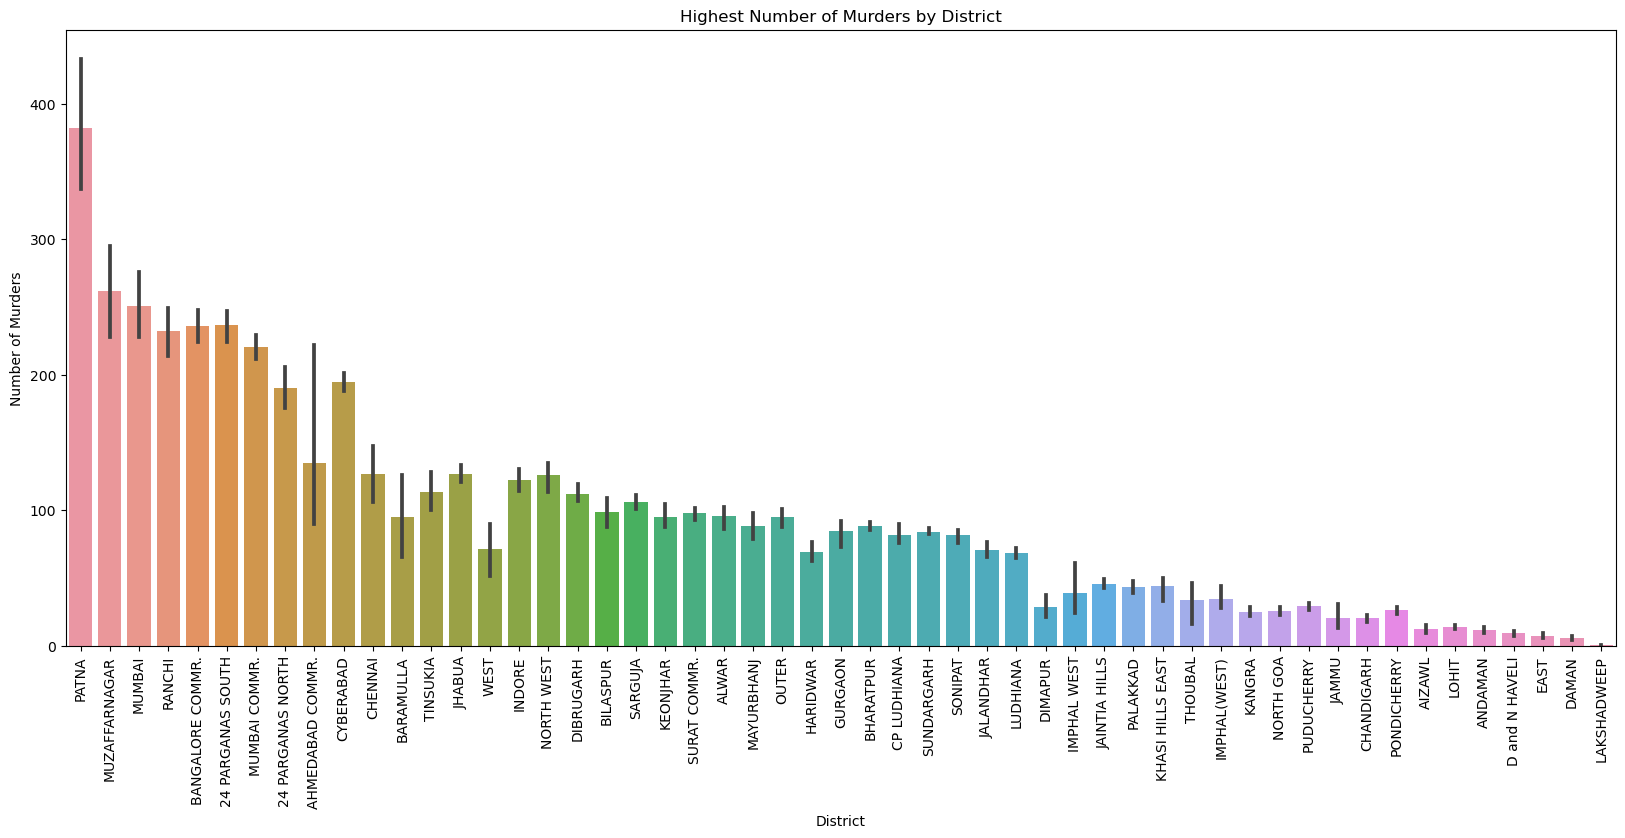

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(20,8))
sns.barplot(data=sorted_df, x='DISTRICT', y='Highest_Murders')
plt.title('Highest Number of Murders by District')
plt.xlabel('District')
plt.ylabel('Number of Murders')
plt.xticks(rotation=90)
plt.show()


In [28]:
year_murder=sorted_df.groupby(by='Year').sum().reset_index()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


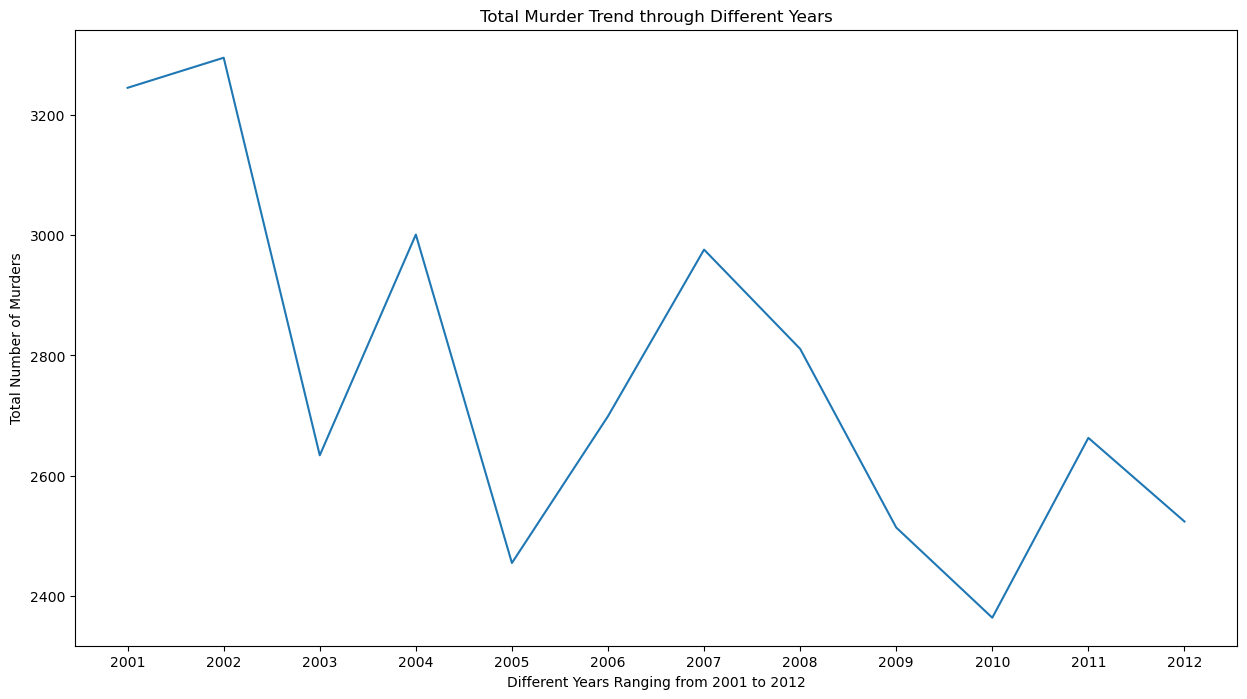

In [29]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=year_murder, x='Year', y='Highest_Murders')
plt.xlabel("Different Years Ranging from 2001 to 2012")
plt.xticks(range(2001, 2013))
plt.ylabel("Total Number of Murders")
plt.title("Total Murder Trend through Different Years")
plt.show()


In [30]:
DYM_df = sorted_df.groupby(['DISTRICT', 'Year']).sum().reset_index()
DYM_df

,DISTRICT,Year,STATE,Highest_Murders
0,24 PARGANAS NORTH,2001,WEST BENGAL,202
1,24 PARGANAS NORTH,2002,WEST BENGAL,204
2,24 PARGANAS NORTH,2003,WEST BENGAL,193
3,24 PARGANAS NORTH,2004,WEST BENGAL,177
4,24 PARGANAS NORTH,2005,WEST BENGAL,168
...,...,...,...,...
353,WEST,2008,TRIPURA,72
354,WEST,2009,TRIPURA,61
355,WEST,2010,TRIPURA,83
356,WEST,2011,TRIPURA,71


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


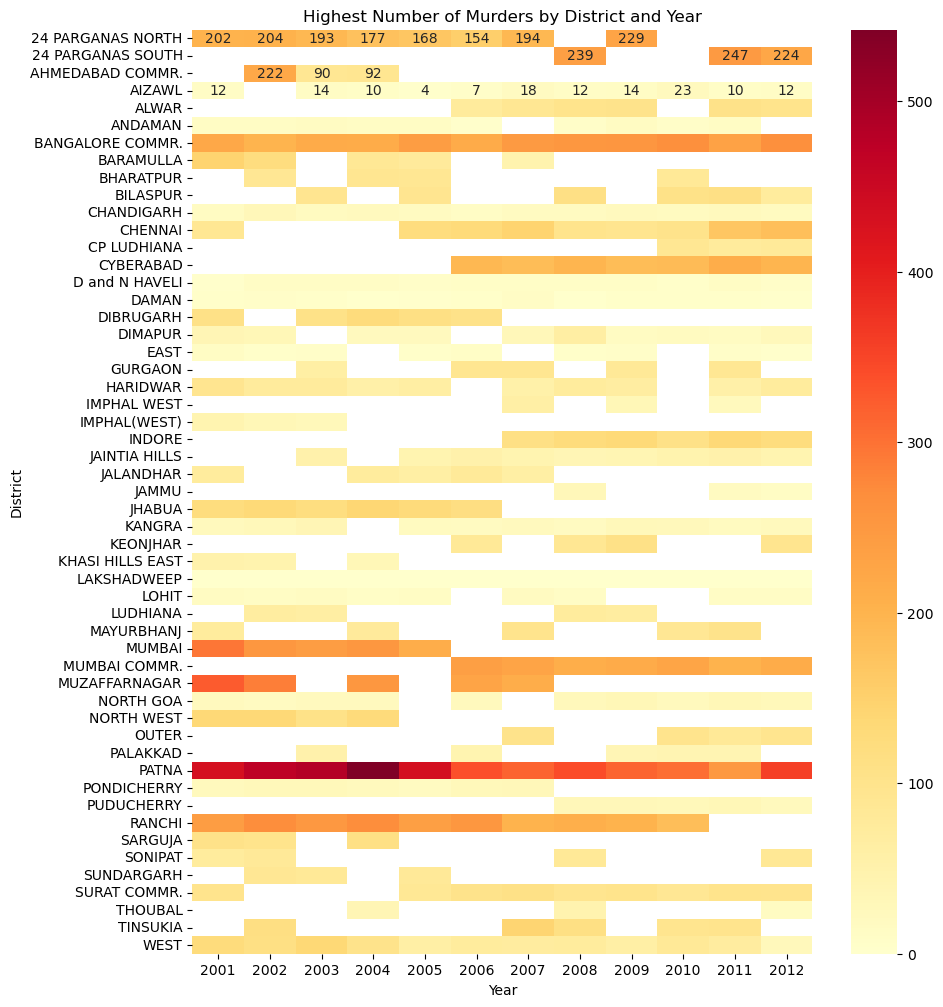

In [31]:
# Pivot the DataFrame to create a matrix of district vs. year with highest murders
pivot_df = DYM_df.pivot(index='DISTRICT', columns='Year', values='Highest_Murders')

# Create a heatmap plot
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Highest Number of Murders by District and Year')
plt.xlabel('Year')
plt.ylabel('District')
plt.show()
